Se carga el dataset que se utilizara

In [16]:
from pandas import DataFrame
import pandas as pd

dataset =  DataFrame(pd.read_csv('potatoeseries03.csv', header=None))
print(dataset.head)

<bound method NDFrame.head of               0
0      8.000000
1      8.000000
2      8.000000
3      8.000000
4      9.000000
5      9.000000
6      9.000000
7      9.000000
8      9.000000
9      9.000000
10     9.000000
11     9.000000
12     9.000000
13     9.000000
14     9.000000
15     9.000000
16     9.000000
17     9.000000
18     9.000000
19     9.000000
20     9.000000
21     8.500000
22     8.000000
23     8.000000
24     8.500000
25     8.500000
26     8.500000
27     8.500000
28     8.500000
29     8.333333
...         ...
2059  15.000000
2060  15.000000
2061  15.000000
2062  15.000000
2063  15.000000
2064  15.000000
2065  15.000000
2066  15.000000
2067  15.000000
2068  15.000000
2069  15.000000
2070  15.000000
2071  15.000000
2072  15.000000
2073  15.000000
2074  15.000000
2075  15.000000
2076  15.000000
2077  12.000000
2078  12.000000
2079  12.000000
2080  12.000000
2081  12.000000
2082  12.000000
2083  12.000000
2084  12.000000
2085  12.000000
2086  12.000000
2087  12.0

Se aplica media movil en los datos.

In [2]:
from matplotlib import pyplot
from sklearn import preprocessing

#dataset_soft = dataset.rolling(window=8, min_periods=1).mean()
#print(dataset_soft)
#pyplot.figure(num=None, figsize=(18, 6), dpi=320, facecolor='w', edgecolor='k')
#pyplot.style.use("ggplot")
#pyplot.plot(dataset[1:150], label='Input')
#pyplot.plot(dataset_soft[1:150], label='Soft')
#pyplot.title('Media móvil Aplicada')
#pyplot.legend()
#pyplot.show()

datasetnorm = preprocessing.minmax_scale(dataset, feature_range=(0, 1))
datasetnorm = DataFrame(datasetnorm)
print(datasetnorm)

             0
0     0.179487
1     0.179487
2     0.179487
3     0.179487
4     0.230769
5     0.230769
6     0.230769
7     0.230769
8     0.230769
9     0.230769
10    0.230769
11    0.230769
12    0.230769
13    0.230769
14    0.230769
15    0.230769
16    0.230769
17    0.230769
18    0.230769
19    0.230769
20    0.230769
21    0.205128
22    0.179487
23    0.179487
24    0.205128
25    0.205128
26    0.205128
27    0.205128
28    0.205128
29    0.196581
...        ...
2059  0.538462
2060  0.538462
2061  0.538462
2062  0.538462
2063  0.538462
2064  0.538462
2065  0.538462
2066  0.538462
2067  0.538462
2068  0.538462
2069  0.538462
2070  0.538462
2071  0.538462
2072  0.538462
2073  0.538462
2074  0.538462
2075  0.538462
2076  0.538462
2077  0.384615
2078  0.384615
2079  0.384615
2080  0.384615
2081  0.384615
2082  0.384615
2083  0.384615
2084  0.384615
2085  0.384615
2086  0.384615
2087  0.384615
2088  0.384615

[2089 rows x 1 columns]


In [23]:
import Tools as tls
from sklearn.model_selection import train_test_split
import numpy as np

IMAGE_SIZE=30
N = 200
cont = 0
cont2 = 0
lista = []
X_train = []
y_train = []
X_test = []
y_test = []
#X_train, y_train, X_test, y_test = tls.SerieToImage(datasetnorm, IMAGE_SIZE)
#print(datasetnorm)
data_train, data_test = train_test_split(datasetnorm[0], test_size=0.33, shuffle=False)
#print(len(data_train),len(data_test))
for d in data_train:
    lista.append(d)
    cont+=1
    cont2+=1
    if cont == N:
        #imageArray = preprocessing.minmax_scale(lista, feature_range=(0, 255))
        dataImage = np.array(lista).reshape(N, 1)
        cont-=1
        lista.pop(0)
        if cont2+1 == len(data_train):
            break
        X_train.append(dataImage)
        y_train.append([data_train[cont2+1]])
cont2 = 0
for d in data_test:
    lista.append(d)
    cont+=1
    cont2+=1
    if cont == N:
        #imageArray = preprocessing.minmax_scale(lista, feature_range=(0, 255))
        dataImage = np.array(lista).reshape(N, 1)
        cont-=1
        lista.pop(0)
        if cont2+1 == len(data_test):
            break
        X_test.append(dataImage)
        y_test.append([data_train[cont2+1]])
print(y_test)

[0.1794871794871795]


Definimos el tamaño de imagen que se utilizara (en pixeles). Y se preparan datos para su conversión

In [4]:
from matplotlib import pyplot
from matplotlib import image


tls.imageDataToJPG(X_train, y_train, 'images/train')
tls.imageDataToJPG(X_test, y_test, 'images/test')

Se envian matrices de datos de series de tiempo para generar las imagenes en formato jepg. Se guardan en el directiorio definido.

In [5]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],X_test.shape[2], 1))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1]))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1]))

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1198, 200, 1, 1) (688, 200, 1, 1) (1198, 1) (688, 1)


Se muestra ejemplo imagen

Ejemplo serie de tiempo como imagen


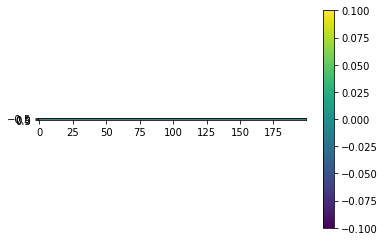

In [6]:
print('Ejemplo serie de tiempo como imagen')
img = image.imread('images/train/1000.jpeg')
pyplot.figure()
pyplot.imshow(img)
pyplot.colorbar()
pyplot.grid(False)


Se construye modelo y se compila

In [7]:
from keras.layers import Convolution2D, Dense, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential

filt = 32
kernel = (3,1)
dropout = 0.05
in_shape = (N,1,1)

model = Sequential((
            Convolution2D(128,kernel_size=kernel, activation='relu',input_shape=in_shape),
            #MaxPooling2D(pool_size=(3, 1)),
            Convolution2D(128,kernel_size=kernel, activation='relu'),
            #MaxPooling2D(pool_size=(3, 1)),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.05),
            Dense(1,activation='linear'),
            ))     
model.compile(loss='mse', optimizer='adam', metrics=['accuracy','mse'])

Using TensorFlow backend.
W0814 10:38:06.619072 10336 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 10:38:06.645002 10336 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 10:38:06.652982 10336 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0814 10:38:06.696865 10336 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeho

Se entrena modelo y se guarda historia.

In [8]:
epochs = 4
history = model.fit(X_train, y_train, epochs=epochs, batch_size=16, validation_data=(X_test, y_test), verbose = 1)

W0814 10:38:06.865414 10336 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 1198 samples, validate on 688 samples
Epoch 1/4
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0264 - acc: 0.0075 - mean_squared_error: 0.0264 - val_loss: 0.0935 - val_acc: 0.0131 - val_mean_squared_error: 0.0935
Epoch 2/4
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0037 - acc: 0.0075 - mean_squared_error: 0.0037 - val_loss: 0.0921 - val_acc: 0.0131 - val_mean_squared_error: 0.0921
Epoch 3/4
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0023 - acc: 0.0075 - mean_squared_error: 0.0023 - val_loss: 0.1369 - val_acc: 0.0044 - val_mean_squared_error: 0.1369
Epoch 4/4
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0018 - acc: 0.0075 - mean_squared_error: 0.0018 - val_loss: 0.1404 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.1404


Se grafican MSE y MAE

In [9]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14035304337415064
Test accuracy: 0.0


<Figure size 432x288 with 0 Axes>

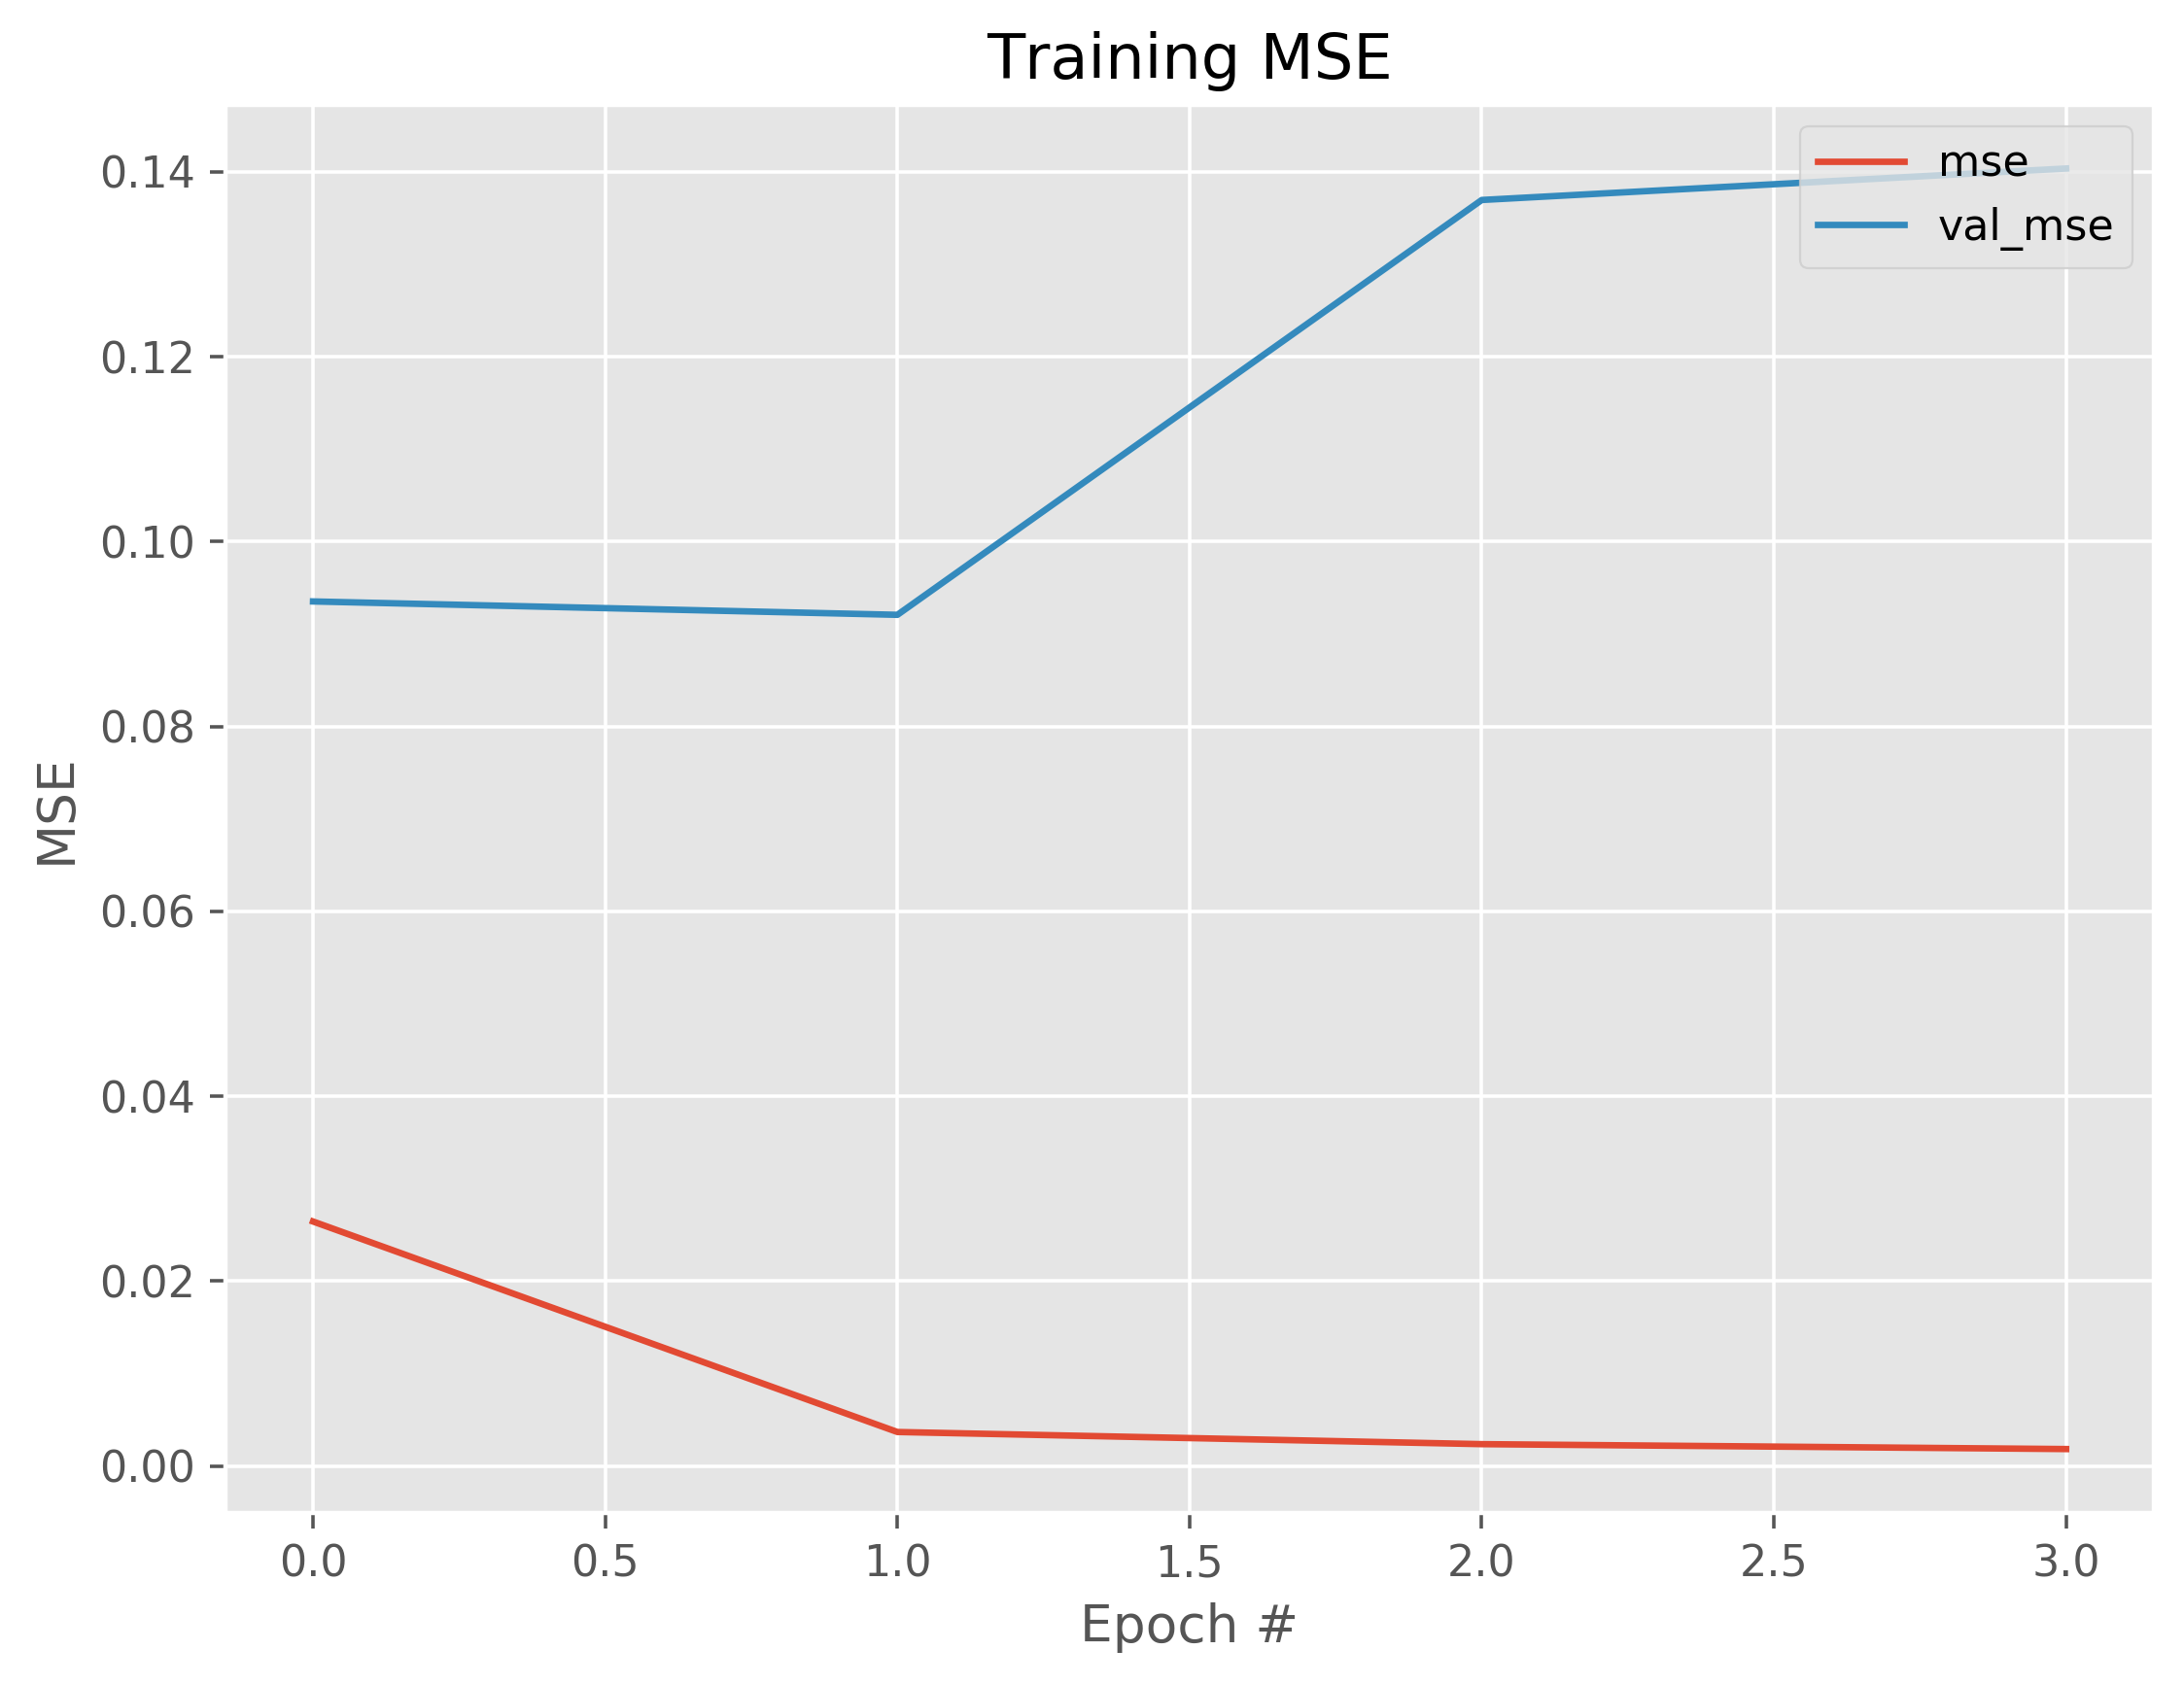

In [10]:
pyplot.style.use("ggplot")
pyplot.figure()
N = epochs
pyplot.figure(num=None, figsize=(8, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.plot(np.arange(0, N), history.history["mean_squared_error"], label="mse")
pyplot.plot(np.arange(0, N), history.history["val_mean_squared_error"], label="val_mse")
pyplot.title("Training MSE")
pyplot.xlabel("Epoch #")
pyplot.ylabel("MSE")
pyplot.legend(loc="upper right")
pyplot.show()

Se realizan predicciones con datos de prueba y se grafican

688/688 [==============================] - 0s 283us/step


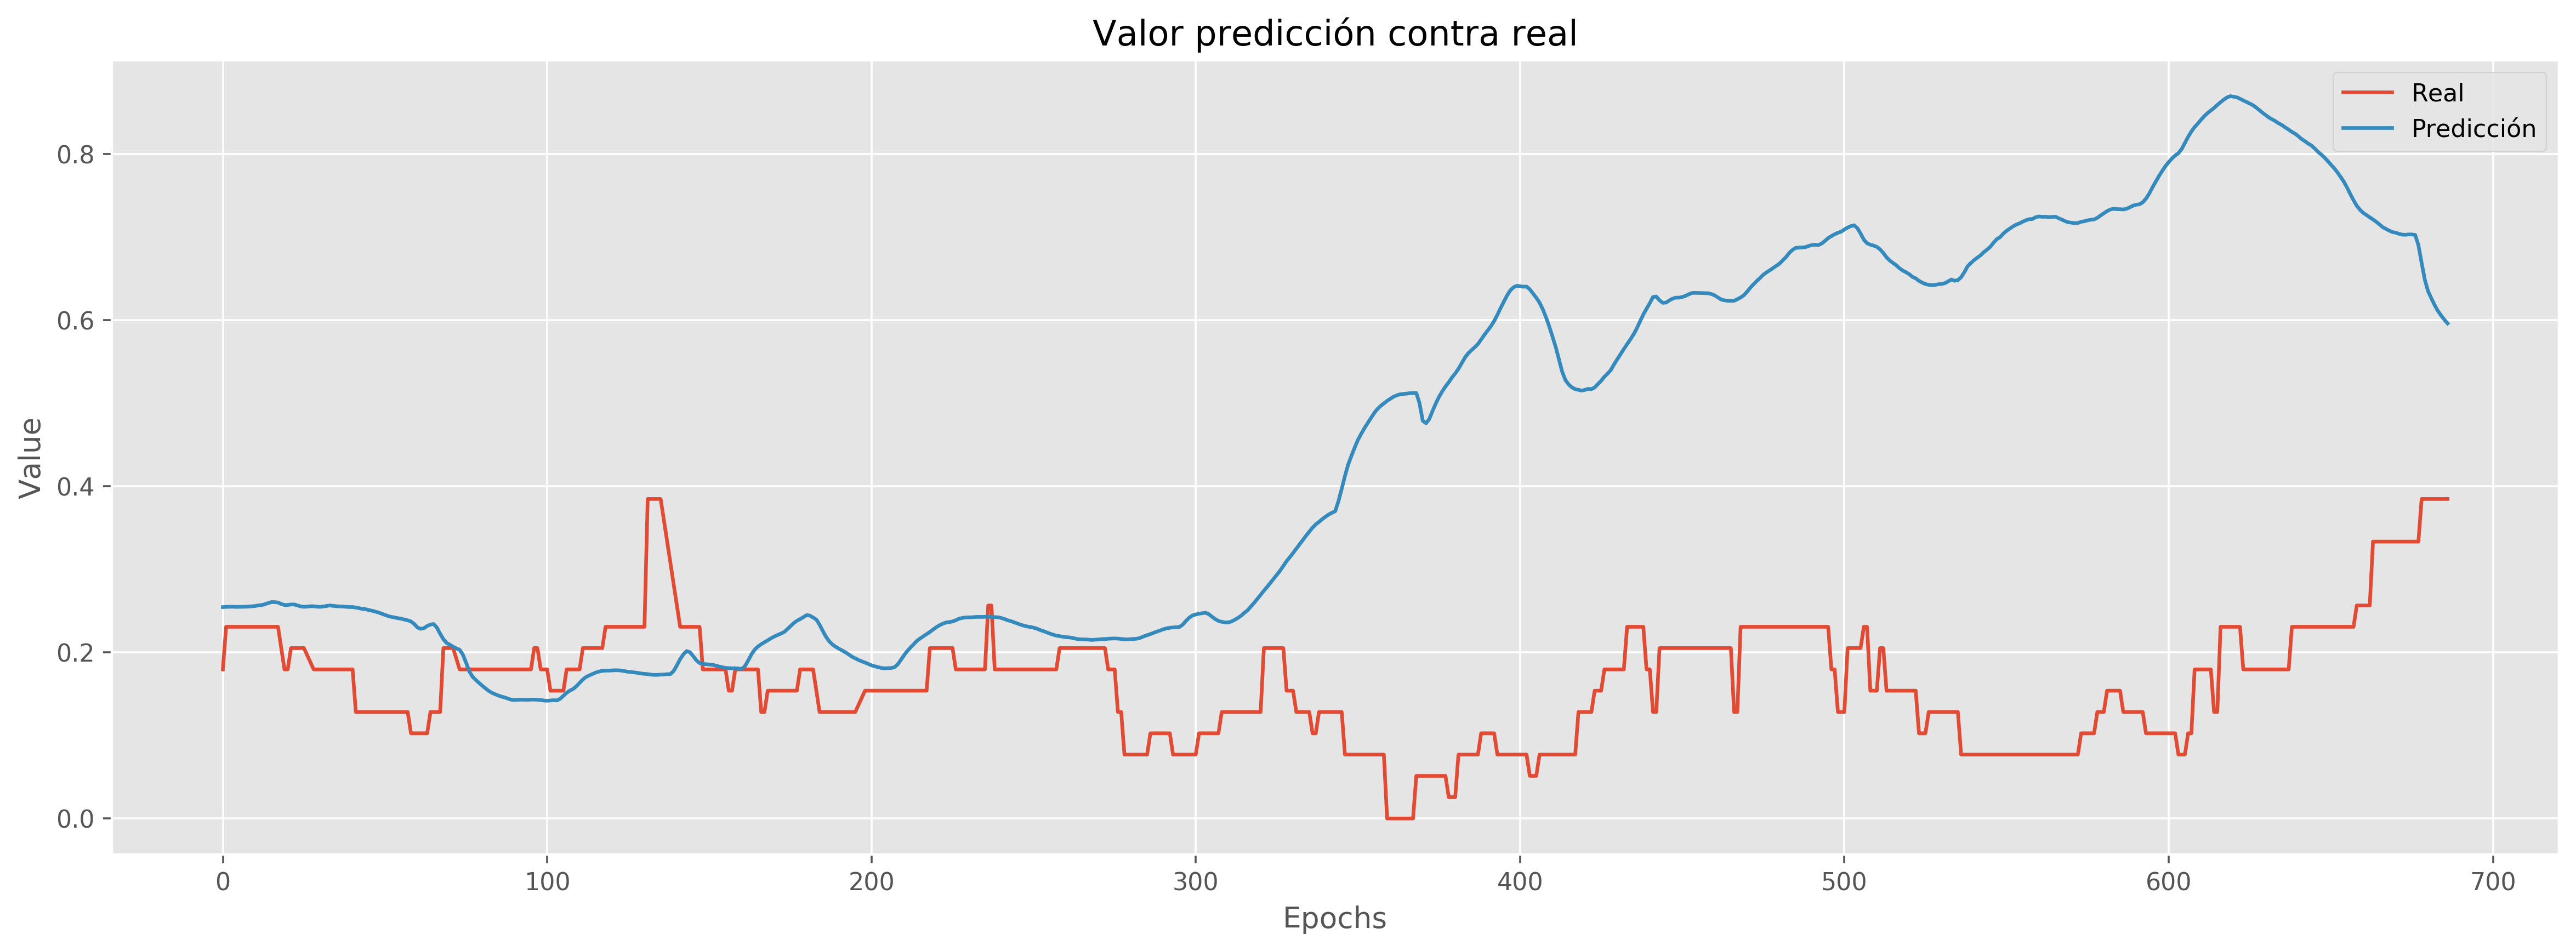

In [11]:
#Se realizan predicciones con datos de prueba
predictions = model.predict(X_test, 10, verbose=1)
#Se grafican predicciones
pyplot.figure(num=None, figsize=(18, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.plot(y_test[1:1100,], label='Real')
pyplot.plot(predictions[1:1100,], label='Predicción')
pyplot.title('Valor predicción contra real')
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.savefig('ex')
pyplot.show()

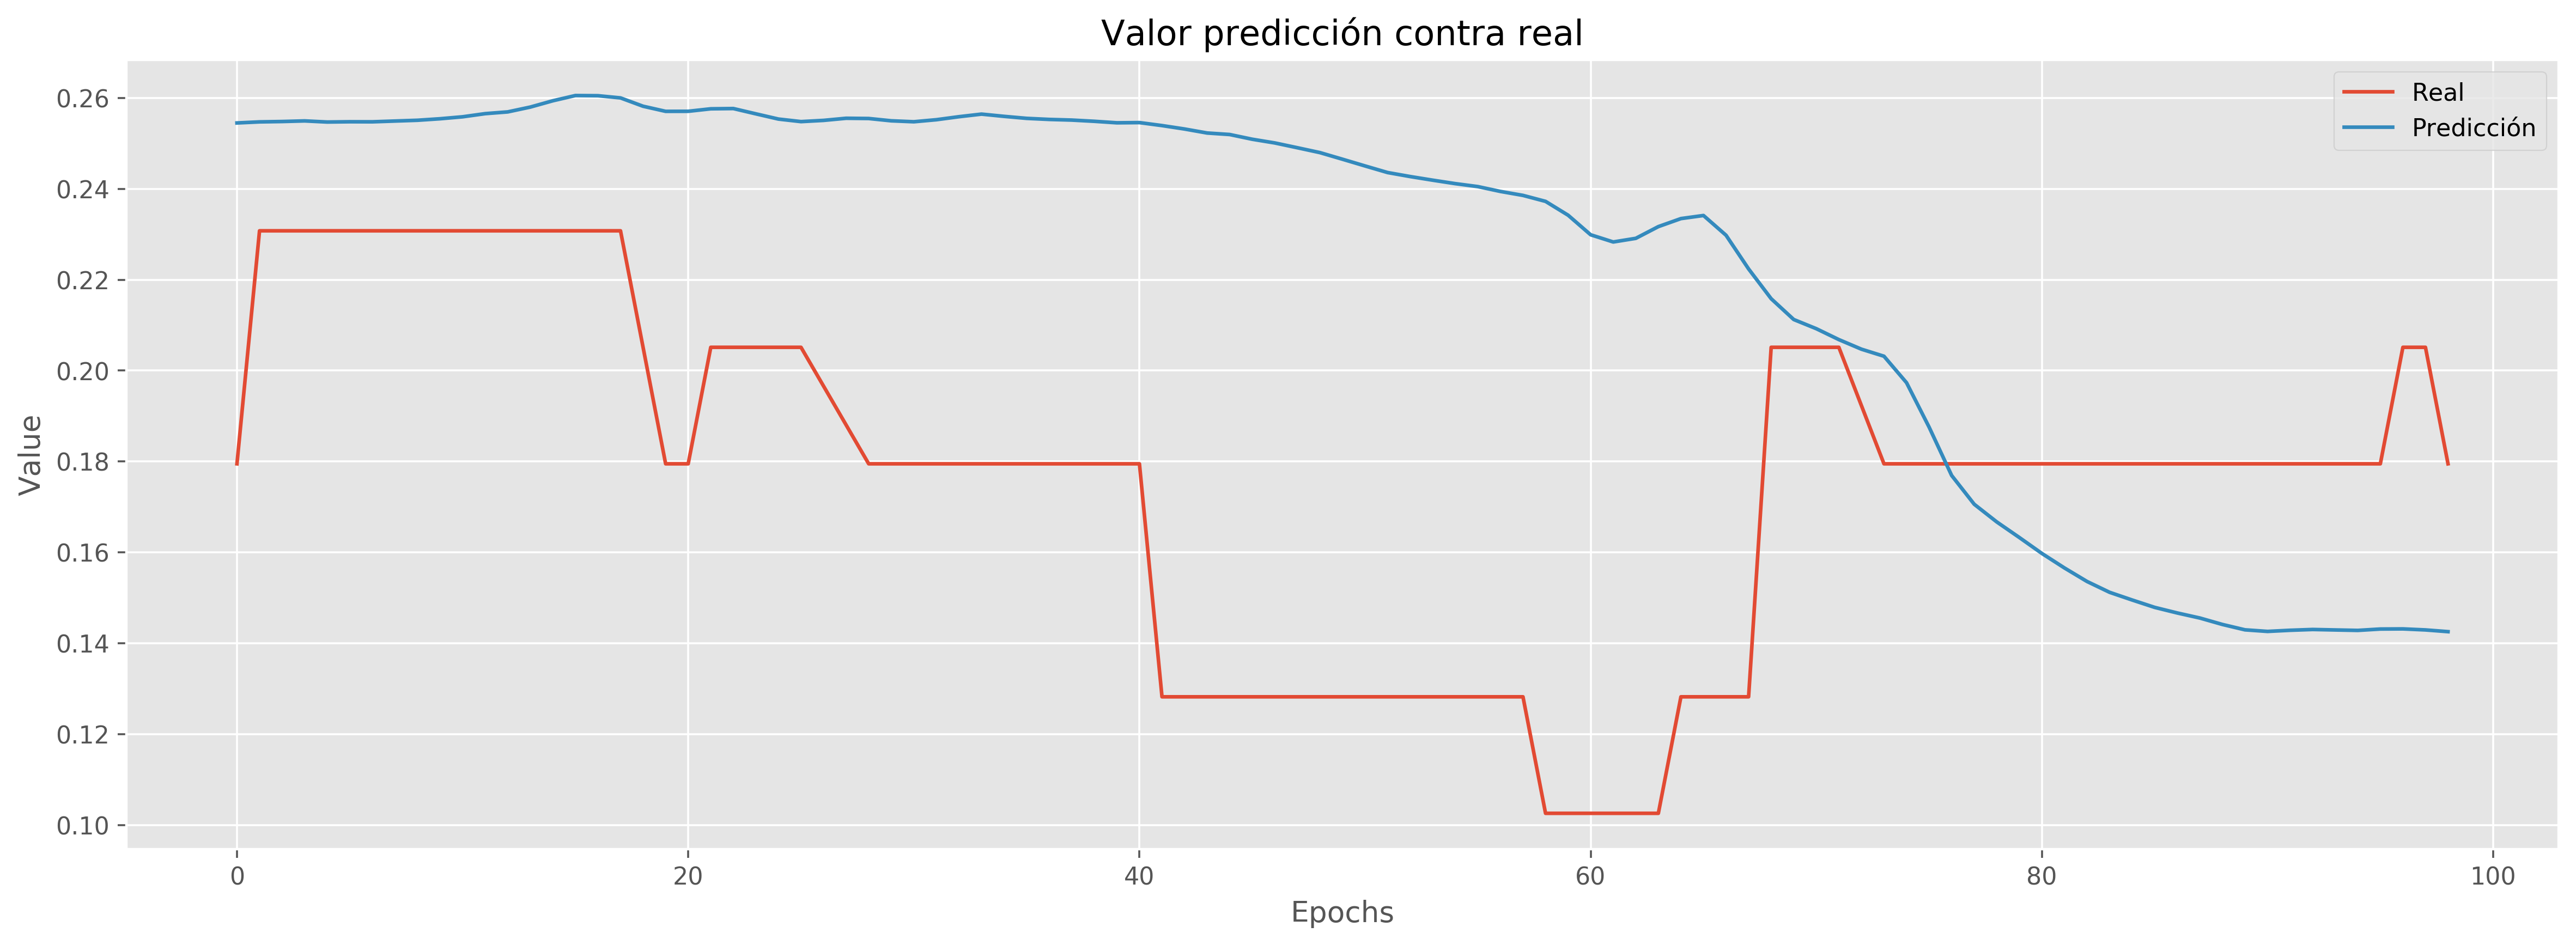

In [12]:
#Se realizan predicciones con datos de prueba
predictions = model.predict(X_test, 24, verbose=0)
#Se grafican predicciones
pyplot.figure(num=None, figsize=(18, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.plot(y_test[1:100,], label='Real')
pyplot.plot(predictions[1:100,], label='Predicción')
pyplot.title('Valor predicción contra real')
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()

In [82]:
from pandas import DataFrame
import pandas as pd
import numpy as np

dataset =  DataFrame(pd.read_csv('potatoeseries03.csv', header=None))

N = 5
cont = 0
cont2 = 0
lista = []
x_value = []
y_value = []

#print(dataset[0][0])
for d in dataset[0]:
    lista.append(d)
    cont+=1
    cont2+=1
    if cont == N:
        arrayData = lista.copy()
        cont-=1
        lista.pop(0)
        if cont2 == len(dataset):
            break
        x_value.append(arrayData)
        y_value.append(dataset[0][cont2])

[12.0, 12.0, 12.0, 12.0, 12.0]


In [96]:
records_to_insert = []

for con in range(0, len(x_value)-1):
    records_to_insert.append(tuple((x_value[con], y_value[con])))
    
print(records_to_insert[1000])

([12.0, 12.0, 12.0, 12.0, 12.0], 12.0)


In [27]:
import psycopg2

try:
    connection = psycopg2.connect(user = "postgres", password = "r351d3nc14501", host = "127.0.0.1", port = "5432", database = "potatoe_values")
    cursor = connection.cursor()
    #Print PostgreSQL Connection properties
    print ( connection.get_dsn_parameters(),"\n")
    #Print PostgreSQL version
    cursor.execute("select * from associated_values")
    record = cursor.fetchone()
    print("You are connected to - ", record,"\n")
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)
finally:
    #closing database connection.
        if(connection):
            cursor.close()
            connection.close()
            print("PostgreSQL connection is closed")

{'user': 'postgres', 'dbname': 'potatoe_values', 'host': '127.0.0.1', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to -  ([Decimal('1.000000'), Decimal('2.000000'), Decimal('3.000000'), Decimal('4.000000'), Decimal('5.000000')], Decimal('6.000000')) 

PostgreSQL connection is closed


In [26]:
import psycopg2

try:
    connection = psycopg2.connect(user = "postgres", password = "r351d3nc14501", host = "127.0.0.1", port = "5432", database = "potatoe_values")
    cursor = connection.cursor()
    postgres_insert_query = """ INSERT INTO associated_values (x, y) VALUES (%s,%s)"""
    record_to_insert = ([2.0, 3.0, 4.0, 5.0, 6.0], 7.0)
    cursor.execute(postgres_insert_query, record_to_insert)
    connection.commit()
    count = cursor.rowcount
    print (count, "Record inserted successfully into mobile table")
except (Exception, psycopg2.Error) as error :
    if(connection):
        print("Failed to insert record into mobile table", error)
finally:
    #closing database connection.
    if(connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

1 Record inserted successfully into mobile table
PostgreSQL connection is closed


In [98]:
#Funcion encargada de hacer multiples insert

def bulkInsert(records):
    try:
        connection = psycopg2.connect(user = "postgres", password = "r351d3nc14501", host = "127.0.0.1", port = "5432", database = "potatoe_values")
        cursor = connection.cursor()
        sql_insert_query = """ INSERT INTO associated_values (x, y) VALUES (%s,%s) """
        # executemany() to insert multiple rows rows
        result = cursor.executemany(sql_insert_query, records)
        connection.commit()
        print(cursor.rowcount, "Record inserted successfully into mobile table")
    except (Exception, psycopg2.Error) as error:
        print("Failed inserting record into mobile table {}".format(error))
    finally:
        # closing database connection.
        if (connection):
            cursor.close()
            connection.close()
            print("PostgreSQL connection is closed")
bulkInsert(records_to_insert)

2083 Record inserted successfully into mobile table
PostgreSQL connection is closed


In [104]:
import psycopg2

x_db = []
y_db = []

#x_db = np.asarray(x_db)

try:
    connection = psycopg2.connect(user = "postgres", password = "r351d3nc14501", host = "127.0.0.1", port = "5432", database = "potatoe_values")
    cursor = connection.cursor()
    postgreSQL_select_Query = "select * from associated_values"
    cursor.execute(postgreSQL_select_Query)
    print("Selecting rows from mobile table using cursor.fetchall")
    value_records = cursor.fetchall() 

    print("Save each column value into the correspondent  array")
    for row in value_records:
        x_db.append(row[0])
        y_db.append(row[1])
except (Exception, psycopg2.Error) as error :
    print ("Error while fetching data from PostgreSQL", error)
finally:
    #closing database connection.
    if(connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")
        
print(x_db[0])
print(y_db[0])

Selecting rows from mobile table using cursor.fetchall
Save each column value into the correspondent  array
PostgreSQL connection is closed
[Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.17948717948717965'), Decimal('0.18589743589743604'), Decimal('0.19230769230769248'), Decimal('0.19871794871794887'), Decimal('0.20512820512820526'), Decimal('0.21153846153846170'), Decimal('0.2115384615384617